In [27]:
import os
import sys
import numpy as np
import re
import pandas as pd
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import pickle
from torch.nn.utils.rnn import pad_sequence
from unicodedata import normalize
from keras.preprocessing.text import Tokenizer
import keras
from torchvision import transforms, datasets
from tqdm import tqdm
from time import sleep
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import pylab as pl
import matplotlib.pyplot as plt

In [28]:
ordem_classes_antigo = ['área_eletricamente_inativa',
       'Bloqueio_de_ramo_direito', 'Bloqueio_de_ramo_esquerdo',
       'Bloqueio_de_ramo_direito_e_bloqueio_divisional_anterossuperior_do_ramo_esquerdo',
       'Bloqueio_intraventricular_inespecífico',
       'Sobrecarga_ventricular_esquerda_(critérios_de_Romhilt-Estes)',
       'Sobrecarga_ventricular_esquerda_(critérios_de_voltagem)',
       'Fibrilação_atrial', 'Flutter_atrial',
       'Bloqueio_atrioventricular_de_2°_grau_Mobitz_I',
       'Bloqueio_atrioventricular_de_2°_grau_Mobitz_II',
       'Bloqueio_atrioventricular_2:1', 'Bloqueio_atrioventricular_avançado',
       'Bloqueio_atrioventricular_total',
       'Pré-excitação_ventricular_tipo_Wolff-Parkinson-White',
       'Sistema_de_estimulação_cardíaca_normofuncionante',
       'Sistema_de_estimulação_cardíaca_com_disfunção',
       'Taquicardia_atrial_multifocal', 'Taquicardia_atrial',
       'Taquicardia_supraventricular', 'Corrente_de_lesão_subendocárdica',
       'Alterações_primárias_da_repolarização_ventricular',
       'Extrassístoles_supraventriculares', 'Extrassístoles_ventriculares',
       'Bradicardia_sinusal',
       'ECG_dentro_dos_limites_da_normalidade_para_idade_e_sexo',
       'Alterações_da_repolarização_ventricular_atribuídas_à_ação_digitálica',
       'Alterações_inespecíficas_da_repolarização_ventricular',
       'Alterações_secundárias_da_repolarização_ventricular',
       'Arritmia_sinusal',
       'Ausência_de_sinal_eletrocardiográfico_que_impede_a_análise',
       'Interferência_na_linha_de_base_que_não_impede_a_análise_do_ECG',
       'Ausência_de_sinal_eletrocardiográfico_que_não_impede_a_análise',
       'Traçado_com_qualidade_técnica_insuficiente',
       'Possível_inversão_de_posicionamento_de_eletrodos',
       'Baixa_voltagem_em_derivações_precordiais',
       'Baixa_voltagem_em_derivações_periféricas',
       'Bloqueio_atrioventricular_de_1°_grau',
       'Bloqueio_de_ramo_direito_e_bloqueio_divisional_posteroinferior_do_ramo_esquerdo',
       'Bloqueio_divisional_anterossuperior_do_ramo_esquerdo',
       'Bloqueio_divisional_posteroinferior_do_ramo_esquerdo',
       'Desvio_do_eixo_do_QRS_para_direita',
       'Desvio_do_eixo_do_QRS_para_esquerda',
       'Dissociação_atrioventricular_isorrítmica',
       'Distúrbio_de_condução_do_ramo_direito',
       'Distúrbio_de_condução_do_ramo_esquerdo', 'Intervalo_PR_curto',
       'Intervalo_QT_prolongado', 'Isquemia_subendocárdica',
       'Progressão_lenta_de_R_nas_derivações_precordiais', 'Pausa_sinusal',
       'Corrente_de_lesão_subepicárdica',
       'Corrente_de_lesão_subepicárdica_-_provável_infarto_agudo_do_miocárdio_com_supradesnivelamento_de_ST',
       'Repolarização_precoce', 'Ritmo_atrial_ectópico',
       'Ritmo_atrial_multifocal', 'Ritmo_idioventricular_acelerado',
       'Ritmo_juncional', 'Síndrome_de_Brugada', 'Sobrecarga_atrial_direita',
       'Sobrecarga_atrial_esquerda', 'Sobrecarga_biatrial',
       'Sobrecarga_biventricular', 'Sobrecarga_ventricular_direita',
       'Sobrecarga_ventricular_esquerda(_critérios_de_voltagem)',
       'Taquicardia_sinusal', 'Taquicardia_ventricular_não_sustentada',
       'Taquicardia_ventricular_sustentada',
       'Suspeita_de_Síndrome_de_Brugada_repetir_V1-V2_em_derivações_superiores',
       'Taquicardia_juncional', 'Batimento_de_escape_atrial',
       'Batimento_de_escape_supraventricular', 'Batimento_de_escape_juncional',
       'Batimento_de_escape_ventricular']
ordem_classes = ['área_eletricamente_inativa',
 'Bloqueio_de_ramo_direito',
 'Bloqueio_de_ramo_esquerdo',
 'Sobrecarga_ventricular_esquerda_(critérios_de_Romhilt-Estes)',
 'Fibrilação_atrial',
 'Flutter_atrial',
 'Bloqueio_atrioventricular_de_2°_grau_Mobitz_I',
 'Pré-excitação_ventricular_tipo_Wolff-Parkinson-White',
 'Sistema_de_estimulação_cardíaca_normofuncionante',
 'Taquicardia_atrial_multifocal',
 'Taquicardia_supraventricular',
 'Alterações_primárias_da_repolarização_ventricular',
 'Extrassístoles_supraventriculares',
 'Extrassístoles_ventriculares',
 'Bradicardia_sinusal',
 'ECG_dentro_dos_limites_da_normalidade_para_idade_e_sexo',
 'Alterações_inespecíficas_da_repolarização_ventricular',
 'Alterações_secundárias_da_repolarização_ventricular',
 'Arritmia_sinusal',
 'Ausência_de_sinal_eletrocardiográfico_que_impede_a_análise',
 'Possível_inversão_de_posicionamento_de_eletrodos',
 'Bloqueio_atrioventricular_de_1°_grau',
 'Bloqueio_divisional_anterossuperior_do_ramo_esquerdo',
 'Bloqueio_divisional_posteroinferior_do_ramo_esquerdo',
 'Desvio_do_eixo_do_QRS_para_direita',
 'Desvio_do_eixo_do_QRS_para_esquerda',
 'Distúrbio_de_condução_do_ramo_direito',
 'Distúrbio_de_condução_do_ramo_esquerdo',
 'Intervalo_PR_curto',
 'Intervalo_QT_prolongado',
 'Isquemia_subendocárdica',
 'Progressão_lenta_de_R_nas_derivações_precordiais',
 'Ritmo_atrial_ectópico',
 'Sobrecarga_atrial_esquerda',
 'Taquicardia_sinusal']

In [29]:
#Loading Data
gold         = pd.read_csv("../../light_data/gold_standard.csv")
labels       = np.load("../../light_data/gold_labels.npy")
valid   = np.load("../../light_data/new_classes.npy")[:,1] 

In [4]:
#ids_achados   = pd.read_csv('../../greenZoneIds.csv', index_col = 0)
#resultLabels   = pd.read_csv('../../../data/resultLabels.csv')
#baseC = pd.read_csv("../../../data/DATA_LAUDOS_TEXTO_formato1", sep = ";")

In [30]:
# Global variables
REBUILD_DATA = False
BIDIRECTIONAL = True
TOP_WORDS = 10000
EPOCHS = 30
BATCH_SIZE = 256

In [31]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("Running on a GPU :D")
else:
    device = torch.device("cpu")
    print("Running on a CPU :/")

Running on a GPU :D


In [33]:
# Oi, Derick
# To comentando como diálogo porque acho mais fácil explicar o código assim. Se o comentário estiver errado é pq essa é a parte que eu entendi errado.
class Net(nn.Module):
    def __init__(self, seq_size):
        
        print("Building NN...")
        embedding_dim = 128
        lstm_out_dim = 128
        num_embeddings = TOP_WORDS
        num_of_classes = 35
        
        super().__init__()
        #Camada de Embedding, o padding_idx é um argumento que eu descobri que é usada para falar para a camada que os números no fim de cada vetor são apenas lixo
        self.l1 = nn.Embedding(num_embeddings, embedding_dim, padding_idx = 0)
        #Eu não entendo muito bem o que essa camada faz. Pelo que eu entendi é algo probabilístico. Mas ela n altera o shape.
#         self.l2 = nn.Dropout(p=0.4)
        #A LSTM recebe os Embeddings e cospe o mesmo número de vetores que eu passei para ela. Não sei se eu deveria alterar o número de camadas da LSTM.
        #Se usar menos de 2 não dá pra colocar Dropout pq o Dropout é aplicado em todas as camadas menos na última.
        self.l3 = nn.LSTM(embedding_dim, lstm_out_dim, dropout = 0.2, num_layers = 2, bidirectional = BIDIRECTIONAL)
        #É o seguinte. Como as dimensões de entrada são estáticas, eu adicionei elas manualmente na camada linear para conseguir fazer o flatten.
        self.l4 = nn.Flatten()
        #Dimensao do vetor de entrada X dimensao da lstm
        self.l5 = nn.Linear(seq_size * lstm_out_dim * (2 if BIDIRECTIONAL else 1), num_of_classes)
        
    
    def forward(self, x):
        #Aqui eu só to passando o input pelas camadas mesmo
        x    = self.l1(x)
#         x    = self.l2(x)
        #A camada de LSTM retorna uma tupla, o vetor que eu quero é a primeira posição da tupla, por isso recebo assim.
        #Acho que a segunda camada da LSTM só é util ao passar de uma camada da LSTM para a outra.
        x, _ = self.l3(x)
        x    = self.l4(x)
        x    = self.l5(x)
        #Aqui eu aplico o softmax. Especifico o número de dimensões para ser um e tal. Não sei o que não está funcionando :c.
        x    = F.softmax(x, dim = 1)
            
        return x

In [34]:
def clean_text(x):
    if type(x) is str:
        pattern = r'[^a-zA-z0-9!.?,:\s]'
        x = normalize('NFKD', x).encode('ASCII', 'ignore').decode('ASCII')
        x = re.sub(pattern, '', x)
        return x
    else:
        return ""

In [35]:
def tokenize(text, tokenizer, fit = False):
    # Creating vocabulary
    if fit:
        tokenizer.fit_on_texts(text)
    # Vectorizing text
    X   = tokenizer.texts_to_sequences(text)
    return X

In [36]:
with open("../../light_data/pytorch_tokenizer_10000.pickle", 'rb') as handle:
    tokenizer = pickle.load(handle)

In [37]:
#Atribua aqui seu teste
text = gold["texto"]

In [39]:
seq_size    = 423
text        = [clean_text(i) for i in text]
test_X_temp = tokenize(text, tokenizer, fit = False)
test_X_temp = [torch.Tensor(i).type(torch.LongTensor) for i in test_X_temp]
test_X_temp = pad_sequence(test_X_temp, batch_first=True).type(torch.LongTensor)

test_X = []
if(len(test_X_temp[0]) < seq_size):
    for i in range(len(test_X_temp)):
        line = test_X_temp[i]
        for j in range(seq_size - len(line)):
            line = torch.cat((line, torch.Tensor([0]).type(torch.LongTensor)), 0)
        test_X.append(line)
else:
    test_X = [line[:seq_size] for line in test_X_temp]
    
test_X = torch.stack([i for i in test_X])

In [41]:
net = Net(seq_size)
net.load_state_dict(torch.load("../../../data/trained_models/pytorch_checkpoint_3.pth",  map_location=torch.device('cuda:0')))
net.eval()

Building NN...


Net(
  (l1): Embedding(10000, 128, padding_idx=0)
  (l3): LSTM(128, 128, num_layers=2, dropout=0.2, bidirectional=True)
  (l4): Flatten()
  (l5): Linear(in_features=108288, out_features=35, bias=True)
)

In [42]:
finalResult = torch.Tensor()
size = 64
for i in tqdm(range(0, test_X.size()[0], size)):
    with torch.no_grad():
        result      = net(test_X[i: min(i+size, test_X.size()[0])])
    finalResult = torch.cat((finalResult, result), 0)

100%|██████████| 21/21 [00:23<00:00,  1.10s/it]


In [46]:
y_test = np.array(np.array([[int(row[i]) for i in range(len(row)) if valid[i]] for row in labels]))
y_score = np.array(finalResult)

In [47]:
n_class = 35
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
thresholds = dict()
roc_auc = dict()
for i in range(n_class):
    fpr[i], tpr[i], thresholds[i] = metrics.roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])

In [175]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

#Function to turn score in binary
#Here the thresholds must be a list of 74 numbers
def getMetrics(y_test, y_score, y_label, thresholds):
    
    #First we turn into binary
    y_bin = []
    for j in range(len(finalResult)):
        ans = []
        for i in range(n_class):
            if finalResult[j][i] > thresholds[i] or y_label[j][i]:
#             if y_label[j][i]:
                ans.append(1)
            else:
                ans.append(0)
        y_bin.append(np.array(ans))
    y_bin = np.array(y_bin)
    
    #Then we calculate
    target_names = ["(" + ordem_classes_antigo[i] + ") Class" + str(i) for i in range(n_class)]
    precision = dict()
    recall = dict()
    f1 = dict()
    sup = dict()
    for i in range(n_class):
        precision[i], recall[i], f1[i], sup[i] = precision_recall_fscore_support(y_test[:,i], y_bin[:,i], average = 'binary')
    return precision, recall, f1, sup

In [56]:
resultLabels = np.load('../../../data/resultados/scores/allLabels.npy')
greenZoneIdx = np.load('../../light_data/greenZoneIndex.npy')
greenZoneIds = np.load("../../../data/newGreenZoneIds.npy")

In [72]:
#Vou ordenar o array de Ids pra poder fazer busca binária
greenZoneIds = [[greenZoneIds[i], i] for i in range(len(greenZoneIds))]
greenZoneIds = np.array(greenZoneIds)
greenZoneIds = greenZoneIds[np.argsort(greenZoneIds[:, 0])]

In [161]:
#Busca binária e tudo mais
y_lev = []
z = 0
for idTarget in gold["id_exame"]:
    pos = np.searchsorted(greenZoneIds[:,0],idTarget)
    if (pos == len(greenZoneIds) or greenZoneIds[pos][0] != idTarget): y_lev.append([0 for i in range(35)])
    else: y_lev.append(resultLabels[greenZoneIdx[greenZoneIds[pos][1]]])
y_lev = np.array(y_lev)

In [167]:
z = 90
print(gold["texto"][z])
print()
for i in range(35):
    if y_lev[z][i] == 1: print(ordem_classes[i])

Ritmo sinusal.Eixo cardiaco desviado para a esquerda (-60 ).Onda P: amplitude e duracao normais.PR: duracao normal.QRS: duracao aumentada (135ms); amplitude normal; morfologia de bloqueio do ramo direito (BRD).ST: sem supra ou infradesnivelamento significativo.Onda T: sem alteracoes significativas.QTc: duração normal.Conclusao:1- Bloqueio do ramo direito.2- Bloqueio divisional anterossuperior. Dr. Fabio Torres Rabelo CRM-MG 39287 Rede de Teleassistencia de Minas Gerais - Belo Horizonte*O eletrocardiograma e um exame complementar, devendo ser correlacionado aos dados clinicos do paciente.*



In [49]:
#Calculate limits by maximizing F1
limits = []
for j in range(n_class):
    print(j)
    bigf1 = 0
    for threshold in thresholds[j]:
        y_bin = []
        for row in finalResult[:,j]:
            if row > threshold:
                y_bin.append(1)
            else:
                y_bin.append(0)
        y_bin = np.array(y_bin)
        precision, _, f1, _ = precision_recall_fscore_support(y_test[:,j], y_bin, average = 'binary')
        
        if(f1 > bigf1 and precision > 0):
            bigf1 = f1
            maxi = threshold
    limits.append(maxi)

0


/home/speed/joao.pedrosa/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34


In [60]:
#Calculate limits maximizing ROC_AUC
# import math
# #Eu to psupondo q se eu minimizar a distancia da curva ROC no ponto superior esquerdo eu vou achar o melhor threshold possivel
# #É essa a teoria
# limits = []
# for j in range(35):
#     dist = 2
#     idist = 0
#     for i in range(len(thresholds[j])):
#         x = fpr[j][i]
#         y = 1 - tpr[j][i]
#         distat = math.sqrt((x * x) + (y * y))
#         if(distat < dist):
#             idist = i
#             dist = distat
#     limits.append(thresholds[j][idist])
#Funcionou bem mal :c

In [185]:
#z = 0.1
#while(z < 1):
precision, recall, f1, _ = getMetrics(y_test, y_score, y_lev, limits)
#   z += 0.1
f1 = sorted(f1.items(), key=lambda x: x[1], reverse=True)
df = pd.DataFrame(columns = ["Class", "Precision", "Recall", "F1", "Ocurrences"])
for row in f1:
    n = row[0]
    sup = y_test[:,n].sum()
    new_row = {'Class': str(ordem_classes_antigo[n]), 'Precision': precision[n], 'Recall': recall[n], 'F1': row[1], "Ocurrences": sup}
    df = df.append(new_row, ignore_index = True)
df = df.set_index("Class")

In [186]:
df

,Precision,Recall,F1,Ocurrences
Class,,,,
Taquicardia_supraventricular,1.000000,0.966667,0.983051,30
Sobrecarga_ventricular_esquerda_(critérios_de_Romhilt-Estes),0.944444,0.971429,0.957746,35
Ausência_de_sinal_eletrocardiográfico_que_não_impede_a_análise,0.857143,1.000000,0.923077,30
Taquicardia_atrial,0.853659,1.000000,0.921053,35
Flutter_atrial,0.859155,0.953125,0.903704,64
Bloqueio_de_ramo_esquerdo,0.892157,0.910000,0.900990,100
Bloqueio_intraventricular_inespecífico,0.831325,0.971831,0.896104,71
Traçado_com_qualidade_técnica_insuficiente,0.861111,0.930000,0.894231,100
Extrassístoles_supraventriculares,0.923077,0.834783,0.876712,230


In [188]:
df.to_csv("../../../data/resultados/scores/results_nn_join.csv")

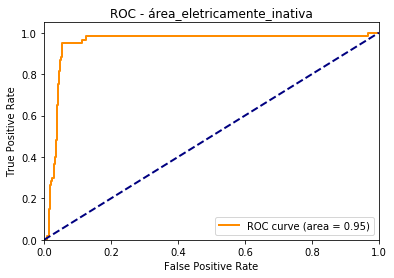

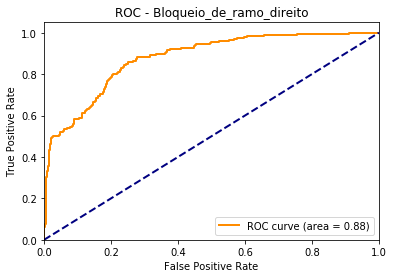

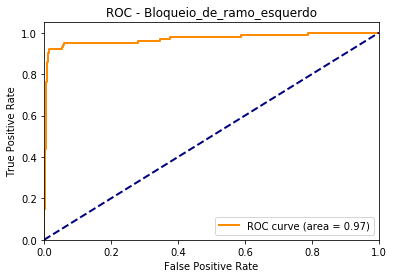

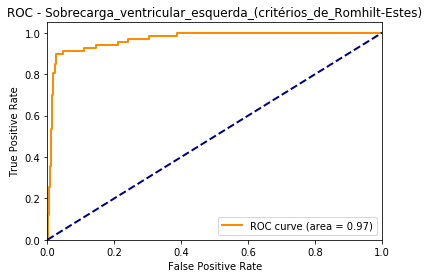

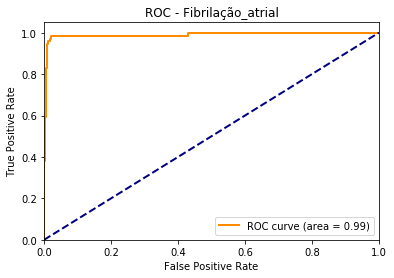

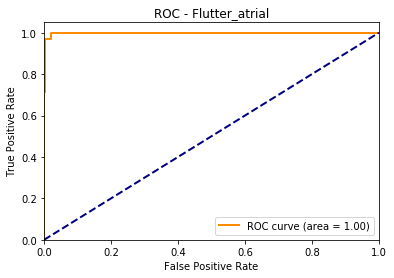

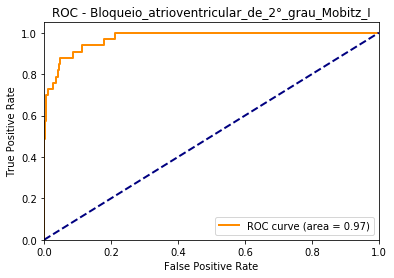

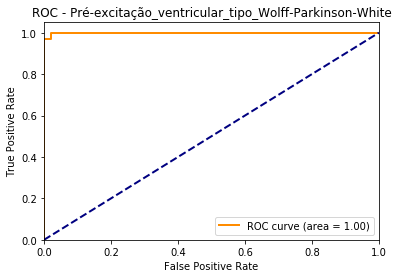

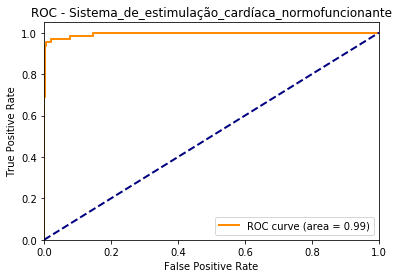

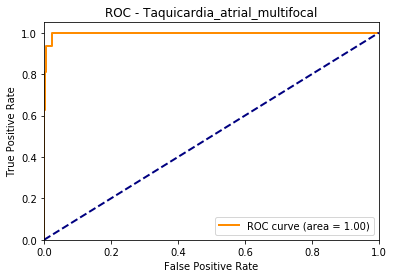

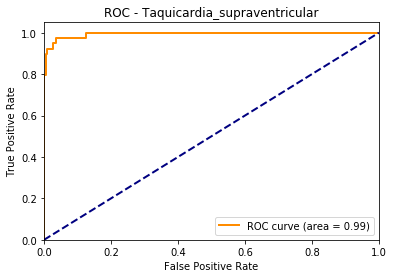

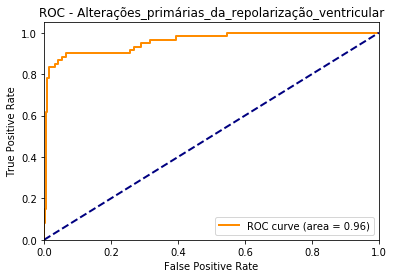

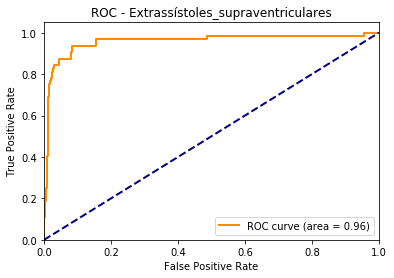

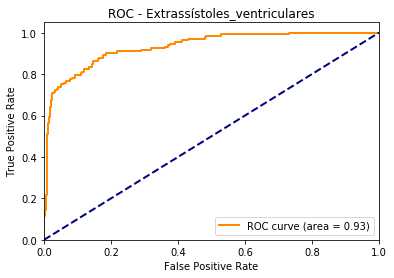

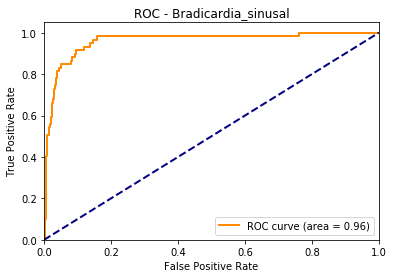

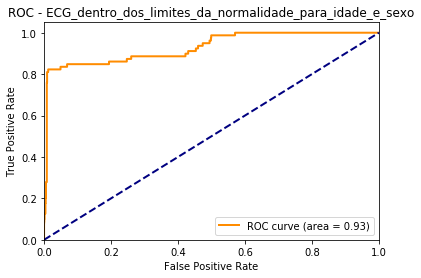

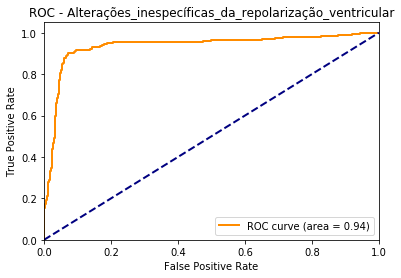

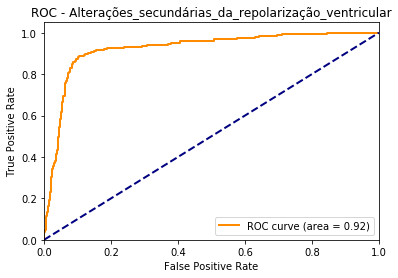

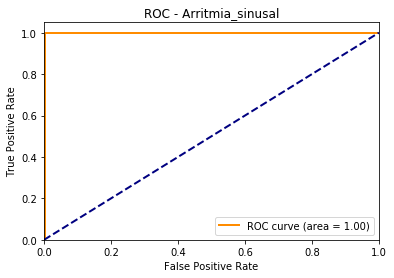

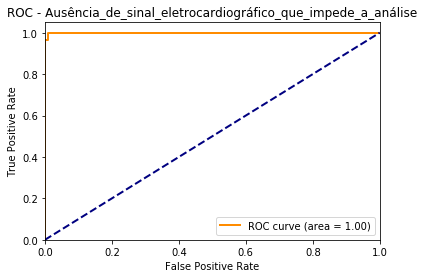

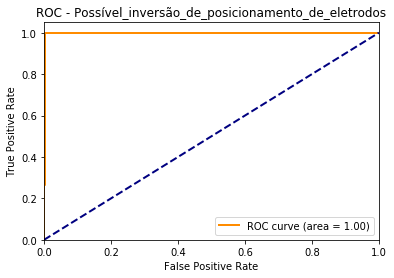

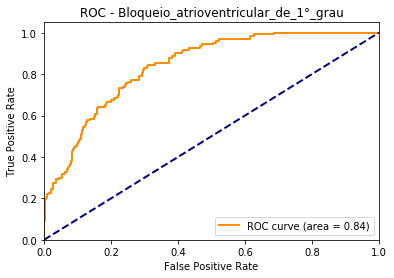

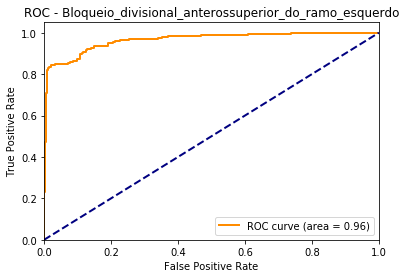

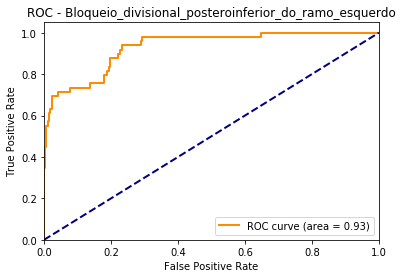

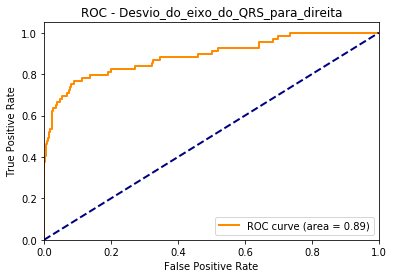

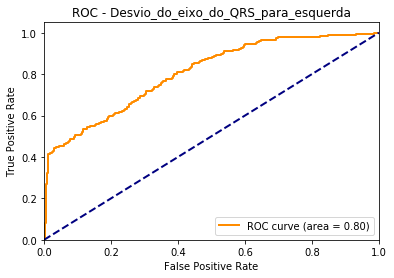

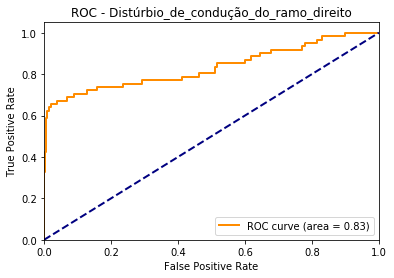

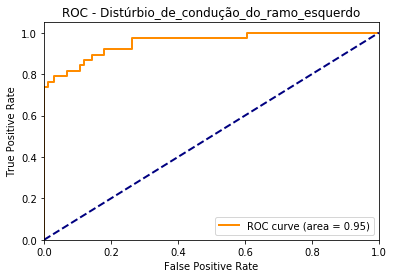

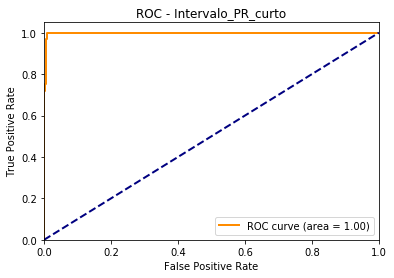

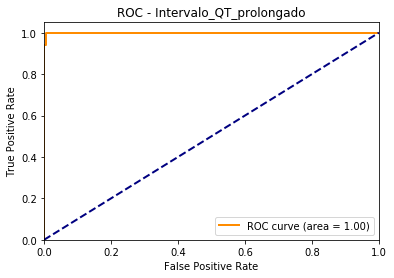

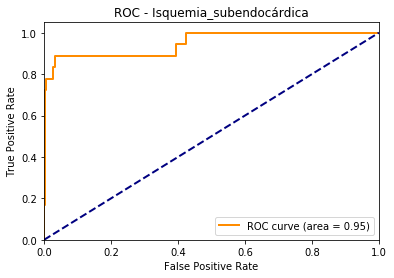

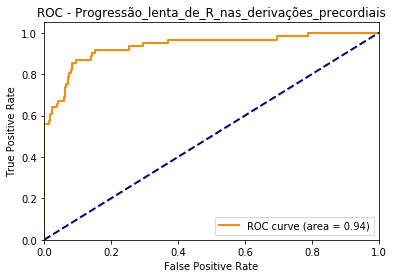

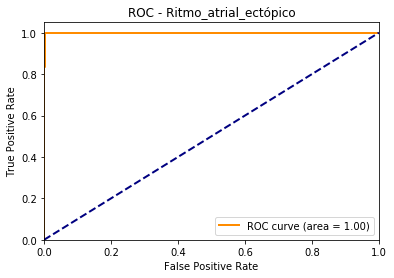

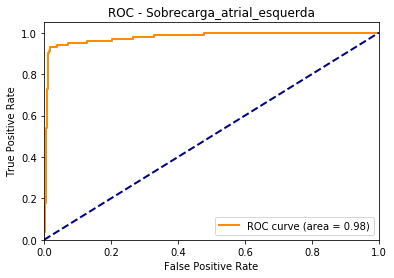

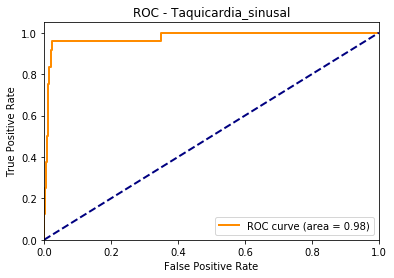

KeyError: 35

<Figure size 432x288 with 0 Axes>

In [132]:
#ROC curves
for i in range(74):
    nClass = i
    plt.figure()
    lw = 2
    plt.plot(fpr[nClass], tpr[nClass], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[nClass])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC - ' + ordem_classes[nClass])
    plt.legend(loc="lower right")
#     plt.savefig('../../test_data/testROC/' + ordem_classes[nClass] + '.png')
    plt.show()

In [3]:
r1  = pd.read_csv("../../../data/resultados/scores/results_nn_1.csv")
r2  = pd.read_csv("../../../data/resultados/scores/results_nn_2.csv")
r3  = pd.read_csv("../../../data/resultados/scores/results_nn_3.csv")
lev = pd.read_csv("../../../data/resultados/scores/results_levenshtein.csv")

In [4]:
lev

,Class,Precision,Recall,F1,Number of Occurrences in Test
0,Ausência_de_sinal_eletrocardiográfico_que_impe...,1.000000,1.000000,1.000000,29
1,Pausa_sinusal,1.000000,1.000000,1.000000,9
2,Flutter_atrial,0.970588,1.000000,0.985075,33
3,Bloqueio_divisional_anterossuperior_do_ramo_es...,0.983784,0.983784,0.983784,185
4,Possível_inversão_de_posicionamento_de_eletrodos,0.965517,1.000000,0.982456,28
...,...,...,...,...,...
69,Sobrecarga_biventricular,0.000000,0.000000,0.000000,0
70,Taquicardia_juncional,0.000000,0.000000,0.000000,0
71,Batimento_de_escape_atrial,0.000000,0.000000,0.000000,0
72,Batimento_de_escape_supraventricular,0.000000,0.000000,0.000000,0


In [10]:
maximum = []
for diag in ordem_classes:
    a = r1[r1["Class"] == diag]["F1"]
    a = a.values[0]
    b = r2[r2["Class"] == diag]["F1"]
    b = b.values[0]
    c = r3[r3["Class"] == diag]["F1"]
    c = c.values[0]
    
    if(max([a,b,c]) == a): maxR = r1
    if(max([a,b,c]) == b): maxR = r2
    if(max([a,b,c]) == c): maxR = r3
    
    maxR = maxR[maxR["Class"] == diag]
    levA = lev[lev["Class"] == diag]
    p   = maxR["Precision"].values[0]
    r   = maxR["Recall"].values[0]
    f1  = maxR["F1"].values[0]
    oc  = r2[r2["Class"] == diag]["Ocurrences"].values[0]
    pl  = levA["Precision"].values[0]
    rl  = levA["Recall"].values[0]
    f1l = levA["F1"].values[0]
    
    
    maximum.append([diag,p,r,f1,oc, pl, rl, f1l])

In [11]:
#Ordering by F1
maximum = np.array(maximum)
maximum = maximum[np.argsort(maximum[:, 3])]
maximum = np.flipud(maximum)

In [16]:
maximum[0][7]

'1.0'

In [24]:
df = pd.DataFrame(columns = ["Class", "Precision",  "LevPrecision", "Recall", "LevRecall", "Max F1", "LevF1", "Ocurrences"])
for row in maximum:
    new_row = {'Class': row[0], 'Precision': row[1],  "LevPrecision": row[5], 'Recall': row[2], "LevRecall": row[6],\
               'Max F1': row[3], "LevF1": row[7], "Ocurrences": row[4]}
    df = df.append(new_row, ignore_index = True)
df = df.set_index("Class")

In [25]:
df

,Precision,LevPrecision,Recall,LevRecall,Max F1,LevF1,Ocurrences
Class,,,,,,,
Ausência_de_sinal_eletrocardiográfico_que_impede_a_análise,1.0,1.0,0.9666666666666668,1.0,0.983050847457627,1.0,30
Flutter_atrial,0.9714285714285714,0.9705882352941176,0.9714285714285714,1.0,0.9714285714285714,0.9850746268656716,35
Sistema_de_estimulação_cardíaca_normofuncionante,1.0,0.9836065573770492,0.9375,0.9375,0.967741935483871,0.96,64
Intervalo_QT_prolongado,1.0,0.967741935483871,0.9117647058823528,0.967741935483871,0.953846153846154,0.967741935483871,34
Pré-excitação_ventricular_tipo_Wolff-Parkinson-White,0.9666666666666668,0.8823529411764706,0.935483870967742,1.0,0.9508196721311476,0.9375,31
Arritmia_sinusal,0.9189189189189191,0.8536585365853658,0.9714285714285714,1.0,0.9444444444444444,0.9210526315789476,35
Ritmo_atrial_ectópico,0.90625,0.9090909090909092,0.9666666666666668,1.0,0.935483870967742,0.9523809523809524,30
Possível_inversão_de_posicionamento_de_eletrodos,0.8787878787878788,0.9655172413793104,0.9666666666666668,1.0,0.9206349206349208,0.9824561403508772,30
Bloqueio_de_ramo_esquerdo,0.936842105263158,0.9620253164556962,0.89,0.9268292682926829,0.9128205128205128,0.9440993788819876,100


In [26]:
df.to_csv("../../../data/resultados/scores/results_nn_max_with_lev.csv")